# Modeling Spin with Arrays

The SPINS Lab experiments have introduced several strange outcomes of quantum mechanics, which we need to be able to model mathematically. Let's first review the essential elements that we need this model to include, and then examine possible mathematical tools.

## What do we need in this model?

In order for a mathematical model to successfully describe these quantum experiments, it needs to...

  I. Allow us to specify the probability of measuring two distinct possible values of spin in three directions (Experiment 1).

  II. Produce the same results on repeated spin measurements (Experiment 1) but

  III. Reset the spin probabilities along one axis after measuring the spin along a different axis (Experiments 2 & 3).

  IV. Account for interference of two separated beams (Experiment 4).

## Scalars won't do.

Would ordinary numbers (scalars) meet our criteria? For example, let's suppose we adopt 6 probability variables for the probability $P$ of measuring a given spin value ($+\hbar/2, -\hbar/2$) along each axis ($x,y,z$): $P(S_z = +\hbar/2), P(S_z = -\hbar/2), P(S_x = +\hbar/2), $ etc. We could specify a beam of spins, for example, as
$ P(S_{x,y,z} = +\hbar/2) = P(S_{x,y,z} = -\hbar/2) = \frac{1}{2}$.

This satisfies Criterion I and II. But how would we implement Criterion III? "If you measure $S_x$, reset $P(S_y = +\hbar/2) = P(S_y = -\hbar/2) = P(S_z = +\hbar/2) = P(S_z = -\hbar/2) $ to $1/2$" is a rather cumbersome instruction, and we'd have to add, "unless the two beams produced by your measurement interfere, then leave the probabilities alone" for Criterion IV. **There aren't any nice, clean scalar operations that could handle this.**

## Arrays work!

So what about **an array**? We learned in Module 1 that Python can handle multiple values in an array.

The states $|+\rangle$ and $|-\rangle$ represent 2 options, so let's try modeling them as arrays with 2 elements. In terms of math, we'll use **column vector** notation, where the **components** of this vector are each listed in a column. Our spin-up $|+\rangle$ ket and spin-down $|-\rangle$ ket would be
\begin{eqnarray}
|+\rangle & = & \left(  \begin{array}{c} 1 \\ 0 \end{array}  \right) \\
|-\rangle & = & \left(  \begin{array}{c} 0 \\ 1 \end{array}  \right)
\end{eqnarray}

With this setup, **any** spin beam (for which we use the general symbol $|\psi\rangle$) can be represented using two scalar coefficients (ordinary numbers) $c_+$ (the up coefficient) and  $c_-$ (the down coefficient):
\begin{equation}
| \psi \rangle = c_+ | + \rangle + c_- | - \rangle.
\end{equation} 

The coefficients $c_+$ and $c_-$ represent how much of the beam is made of spin-up and spin-down particles, respectively. For example, a beam $|\psi\rangle$ with all spin-up and no spin-down would have $c_+ = 1$ and $c_- = 0$.

When we **add** two arrays (or column vectors), the top elements add and the bottom elements add, just like vector components. That means our $|\psi\rangle$ becomes...
\begin{eqnarray}
| \psi \rangle & = &  c_+ \left(  \begin{array}{c} 1 \\ 0 \end{array}  \right) + c_- \left(  \begin{array}{c} 0 \\ 1 \end{array}  \right) \\
& = & \left(  \begin{array}{c} c_+ \\ c_- \end{array}  \right).
\end{eqnarray} 

We can then use **matrix multiplication** to evaluate the probability of a given spin measurement (satisfying Criterion I). You can read up on matrix multiplication [here](https://mathsisfun.com/algebra/matrix-multiplying.html), or watch [this video](https://www.youtube.com/watch?v=2spTnAiQg4M).

We can multiply two arrays by taking the **conjugate transpose** of one of the arrays, turning it into a row array with complex conjugates inside. For example, if we wanted to multiply $|a\rangle$ and $|b\rangle$ defned as
\begin{eqnarray}
|a\rangle & = & \left(  \begin{array}{c} a_+ \\ a_- \end{array}  \right) \\
|b\rangle & = & \left(  \begin{array}{c} b_+ \\ b_- \end{array}  \right),
\end{eqnarray}
we could take the conjugate transpose of $|a\rangle$, which is the bra $\langle a |$, written like this:
\begin{equation}
\langle a | = \left(  \begin{array}{cc} a_+^* & a_-^* \end{array}  \right).
\end{equation}
Notice that $\langle a |$ is a **row vector** instead of a column vector, but it's still an array with multiple elements. We draw the $\langle  |$ pointing the opposite direction to remind ourselves that it's a different structure than $| \rangle$.

We can then multiply bra $\langle a |$ with ket $| b \rangle$ to get
\begin{eqnarray}
\langle a | b \rangle & = & \left(  \begin{array}{cc} a_+^* & a_-^* \end{array}  \right) \left(  \begin{array}{c} b_+ \\ b_- \end{array}  \right) \\
& = & a_+^*b_+ + a_-^*b_-.
\end{eqnarray} 
The notation $\langle a | b \rangle$ is a shorthand for this vector multiplication. If the result $a_+^*b_+ + a_-^*b_-$ looks familiar, it's becuase this process is nearly identical to finding the **dot product** between two vectors (with the extra step of complex conjugation). Since we're talking about abstract arrays instead of physical vectors, we call this the **inner product** (but if you call it "the dot product," I'll know what you mean). 

**The inner product modulus squared gives the probability of obtaining a given spin measurement.** For exmaple, let's suppose we prepare a beam that is 50% spin-up and 50% spin-down, like in our experiments. We could represent this beam as $|\psi\rangle = \frac{1}{\sqrt{2}} |+\rangle + \frac{1}{\sqrt{2}} |-\rangle$. The relevant inner product is
\begin{eqnarray}
\langle + | \psi \rangle & = & \left(  \begin{array}{cc} 1 & 0 \end{array}  \right) \left(  \begin{array}{c} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{array}  \right) \\
& = & 1 \cdot \frac{1}{\sqrt{2}} + 0 \cdot \frac{1}{\sqrt{2}}  \\
& = & \frac{1}{\sqrt{2}}
\end{eqnarray}
Then, the probability of measuring $S_z = +\hbar/2$ would be 
\begin{eqnarray}
P(S_z = +\hbar/2) & = & \left| \langle + | \psi \rangle \right|^2 = \frac{1}{2}.
\end{eqnarray}
The probability is 50%, as expected! Criterion I is mostly satisfied. Now we need a way to represent measuring spin along the x- and y-axes.

But first, a few things to note:

* The result of the inner product (like the dot product) is a **scalar** value. There are no kets leftover. This scalar might be a complex number, but notice that the modulus squared operation makes it real and nonnegative.
*  The conjugated transposed vector $\langle a |$ is called a **bra** so that together, $\langle a | b \rangle$ make a bra-ket (bracket; the c is silent).
* The inner product between $|+\rangle$ and $|-\rangle$ is exactly zero (Try it!). These two vectors are **orthogonal**, just like the $x, y$, and $z$ directions in three-dimensional space give zero dot product and are orthogonal.

Finally, we hope you'll note that, although the bra-ket notation is new, **the math involves nothing more than multiplication and addition**. However, even two-dimensional vectors represent a lot to keep track of, and the mathematical hoops can sometimes distract from the physics. **That's why we're going to represent these vectors with arrays** so that Python can take care of these mathematical steps for us. While it's important to understand *what* the code is doing, we want students to feel comfortable *letting the computer take care of it*.

# Try it out

In the code cell below, we set up column vectors `SpinUp` and `SpinDown` to represent $|+\rangle$ and $|-\rangle$ using **arrays**. We use the **np.dot** function to calculate the inner product (again, the same as the dot product) of these two vectors.

We also model our beam $|\psi\rangle$ that is 50% spin-up and 50% spin-down using the linear combination $|\psi\rangle = \frac{1}{\sqrt{2}} |+\rangle + \frac{1}{\sqrt{2}} |-\rangle$ by defining coefficients `cUp` and `cDown`. We then compute the probability of a spin-up and spin-down measurement using the inner-product-squared procedure.

By modifying this code, can you find a combination of `cUp` and `cDown` values that produce a beam that is...
* 100% spin-up and 0% spin-down?
* 2/3rds spin-up and 1/3rd spin-down?
* 10% spin-up and 90% spin-down?

Keep track of these values for `cUp` and `cDown`; you'll use them later.


[Double click here and replace the text with answers to the following:

* What values of `cUp` and `cDown` did you use for each beam?
* What is the relationship between each coefficient `cUp` and `cDown` and the probability of the corresponding spin measurement spin-up and spin-down?]
* How does the code enable you to focus more attention on the physical meaning?]

<details>
<summary>You should have found that (click for the spoiler)...</summary>
...the coefficients `cUp` and `cDown` become the probability of each spin measurements after you square them. This pattern allows us to **read off** the probabilities quite quickly just from the elements of the column vector.
</details>

inner product of SpinUp and SpinDown
0
probability of each spin measurement in 50-50 beam
up 0.4999999999999999
down 0.4999999999999999


<BarContainer object of 2 artists>

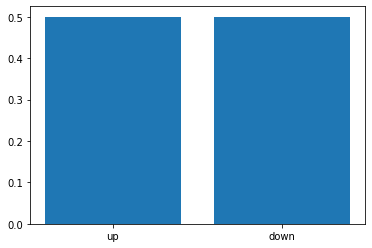

In [ ]:
import numpy as np

SpinUp   = np.array([1,0])
SpinDown = np.array([0,1])

# SpinUp and SpinDown have zero inner product.
print('inner product of SpinUp and SpinDown')
print(np.dot(SpinUp,SpinDown))

# Here's our 50-50 beam.
cUp   = 1/np.sqrt(2)
cDown = 1/np.sqrt(2)
beam = cUp*SpinUp + cDown*SpinDown
print('probability of each spin measurement in 50-50 beam')
upProbability    = np.abs(np.dot(np.conj(SpinUp),beam))**2
downProbability = np.abs(np.dot(np.conj(SpinDown),beam))**2
print('up',  upProbability )
print('down', downProbability)

import matplotlib.pyplot as plt

# Create a figure.
MyFigure, MyPlot = plt.subplots()

# Plot data.
MyPlot.bar(['up','down'],[upProbability,downProbability])



**A Very Important Question:** Look back over the combinations of `cUp` and `cDown` that you came up with. Are there any other possibilities that might work? Remember that we **square** the inner product to get the probability. Is there a simple way you can change any value of `cUp` and `cDown` that produces the same probability thanks to the **squaring** operation?

<details>
<summary>You should have found that (click for the spoiler)...</summary>
...you can make `cUp` and `cDown` negative and keep the probabilities the same. This will be very useful shortly!
</details>

[Double click here and replace the text with your answer to the question above.]


## Application: Quantum Memory Storage (Spintronics)

One of the most important applications of spin is its use in **memory storage at the quantum level**. The states $|+\rangle$ and $|-\rangle$ become the basis of memory storage bits.

Choose two articles to read from [this folder](
https://drive.google.com/drive/folders/1iNCTCLzMOHhUosCTdnULhRLuNDODWwad?usp=sharing). Based on your articles, write a paragraph in our [Canvas Discussion Board](https://ncssm.instructure.com/courses/7002/discussion_topics/69690) about how spin is used for memory storage.

## Application: MRI

An important medical use of spin is **magnetic resonance imaging** (MRI), which has transformed our ability to study the workings of the human body. MRIs use radio waves and magnetic fields to probe the nuclear spin of atoms in the body.

Choose two articles or videos from [this folder](https://drive.google.com/drive/folders/1jWwRuPHVGPPfwMiWBpwIEiy_WtIkdb5Y?usp=sharing) or the list below. 
* https://www.youtube.com/watch?v=pcyfvwnHddA
* https://www.youtube.com/watch?v=2XO_NHHn6Eg
* https://www.youtube.com/watch?v=nFkBhUYynUw
* https://www.youtube.com/watch?v=XgIytITAWe0
* https://www.youtube.com/watch?v=TQegSF4ZiIQ 

Based on your articles or videos, respond in our [Canvas Discussion Board](https://ncssm.instructure.com/courses/7002/discussion_topics/69691) about how spin is used in MRIs.